<a href="https://colab.research.google.com/github/Shadhin282/Machine-learning-problem-Solving/blob/main/Linear_Regression_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dict_ = {
    'Weight': [2,4,5,3,6,5,7],
    'Price' : [35,60,20,50,50,55,60]
}
dict_

{'Weight': [2, 4, 5, 3, 6, 5, 7], 'Price': [35, 60, 20, 50, 50, 55, 60]}

In [3]:
df = pd.DataFrame(dict_)
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [4]:
df.shape

(7, 2)

In [6]:
df.corr()

,Weight,Price
Weight,1.000000,0.306795
Price,0.306795,1.000000


In [7]:
df['Weight']

0    2
1    4
2    5
3    3
4    6
5    5
6    7
Name: Weight, dtype: int64

In [8]:
df['Price']

0    35
1    60
2    20
3    50
4    50
5    55
6    60
Name: Price, dtype: int64

Text(0.5, 1.0, 'Weight and Price')

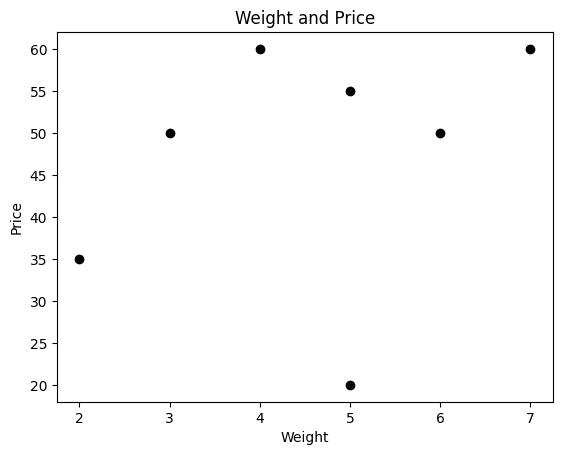

In [13]:
plt.scatter(df['Weight'], df['Price'], color = 'black')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight and Price')

In [14]:
# Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
# Intercept, c = ȳ - m * x̄

In [16]:
x = df['Weight']
x

0    2
1    4
2    5
3    3
4    6
5    5
6    7
Name: Weight, dtype: int64

In [17]:
y = df['Price']
y

0    35
1    60
2    20
3    50
4    50
5    55
6    60
Name: Price, dtype: int64

In [18]:
mean_x = np.mean(x)
mean_x

4.571428571428571

In [19]:
mean_y = np.mean(y)
mean_y

47.142857142857146

In [22]:
dev_x = x-mean_x
dev_x

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
5    0.428571
6    2.428571
Name: Weight, dtype: float64

In [23]:
dev_y = y-mean_y
dev_y

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
5     7.857143
6    12.857143
Name: Price, dtype: float64

In [25]:
# Slope
m = np.sum(dev_x*dev_y)/np.sum(dev_x**2)
m

2.620967741935484

In [27]:
#intercept
c = mean_y - m*mean_x
c

35.16129032258065

In [28]:
#predict price for weight 6

In [29]:
predict_y = m * 6 + c
predict_y

50.88709677419355

In [30]:
Predict_price = m * x + c
Predict_price

0    40.403226
1    45.645161
2    48.266129
3    43.024194
4    50.887097
5    48.266129
6    53.508065
Name: Weight, dtype: float64

In [31]:
df['Predict Price'] = Predict_price
df

,Weight,Price,Predict Price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [33]:
#residual
R = df['Predict Price'] - df['Price']
R

0     5.403226
1   -14.354839
2    28.266129
3    -6.975806
4     0.887097
5    -6.733871
6    -6.491935
dtype: float64

In [34]:
df['Residuals'] = R
df

,Weight,Price,Predict Price,Residuals
0,2,35,40.403226,5.403226
1,4,60,45.645161,-14.354839
2,5,20,48.266129,28.266129
3,3,50,43.024194,-6.975806
4,6,50,50.887097,0.887097
5,5,55,48.266129,-6.733871
6,7,60,53.508065,-6.491935


Text(0.5, 1.0, 'Weight and Price')

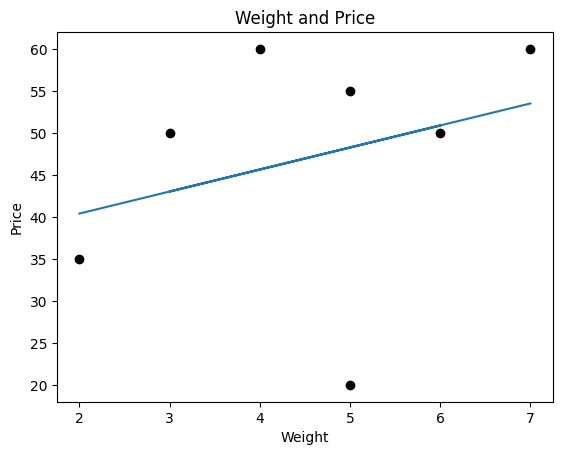

In [36]:
plt.plot(df['Weight'], df['Predict Price'])
plt.scatter(df['Weight'], df['Price'], color = 'black')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight and Price')

In [37]:
# SKLEARN

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
df[['Weight']]

,Weight
0,2
1,4
2,5
3,3
4,6
5,5
6,7


In [40]:
df['Weight']

0    2
1    4
2    5
3    3
4    6
5    5
6    7
Name: Weight, dtype: int64

In [41]:
reg = LinearRegression()
reg.fit(df[['Weight']],df[['Price']])

LinearRegression()

In [42]:
reg.coef_

array([[2.62096774]])

In [43]:
reg.intercept_

array([35.16129032])

In [44]:
reg.predict([[6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.88709677]])

In [46]:
df['Predict'] = reg.predict(df[['Weight']])
df[['Weight','Price','Predict']]

,Weight,Price,Predict
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


Text(0.5, 1.0, 'Weight and Price Ratio of Vegetable')

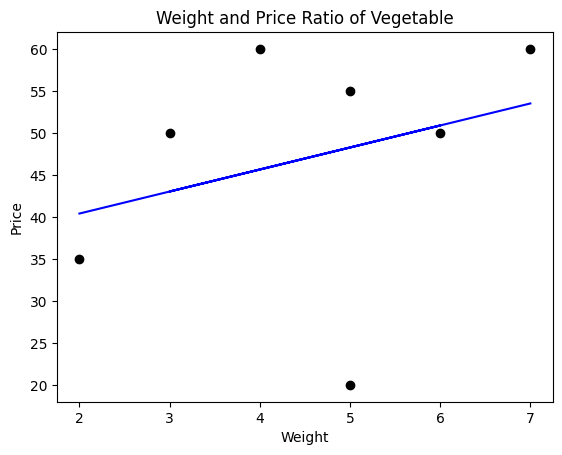

In [50]:
plt.plot(df[['Weight']],df[['Predict']], color='blue')
plt.scatter(df['Weight'],df['Price'], color = 'black')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight and Price Ratio of Vegetable')

In [51]:
# MSE and MAE

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
mse = mean_squared_error(df[['Price']],df[['Predict']])
mse

167.30990783410135

In [56]:
mae = mean_absolute_error(df[['Price']],df[['Predict']])
mae

9.87327188940092

In [59]:
import math

In [60]:
RMSE = math.sqrt(mse)


In [61]:
RMSE

12.934833119685052